# Прогнозирование: Покупки страховки на транспорт клиентом

## Описание задачи

Страховая фирма хочет спрогнозировать возьмёт ли человек страховку на транспорт, на основе следующих собранных данных:

- Демография (пол, возраст, тип кода региона),

- Транспортные средства (Возраст Транспортного средства, Повреждения),

- Политика страхования(премия, ценовые каналы)


в тренировочной выборке: 286615 клиентов

в тестовой выборке :95539 клиента

## Чтение данных

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np          
import seaborn as sns         
import sklearn      

train_dataset = []
test_dataset = []
dataset = []

dataset = pd.read_csv("insurance/aug_train.csv", sep=',', encoding="Windows-1252")

### Рассмотрим информацию о датасете

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
dataset.shape

(382154, 12)

In [55]:
dataset.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [56]:
dataset.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382144,340265,Male,24,1,49.0,0,< 1 Year,Yes,2630.0,160.0,273,0
382145,213608,Female,25,1,6.0,1,< 1 Year,No,22911.0,152.0,131,0
382146,157507,Male,56,1,17.0,0,1-2 Year,Yes,45936.0,124.0,244,0
382147,498091,Female,48,1,28.0,0,1-2 Year,Yes,42805.0,26.0,80,1
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


### В наборе данных нет пропущенных значений

Некоторые признаки являются категориальными, но имеют типы object или int64, поэтому необходимо привести соответствующие столбцы к типу category

In [58]:
categorical_ind = list(range(5,8)) + [1] + [3] + [11]
dataset.iloc[:,categorical_ind]=dataset.iloc[:,categorical_ind].astype('category')

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    382154 non-null  int64   
 1   Gender                382154 non-null  category
 2   Age                   382154 non-null  int64   
 3   Driving_License       382154 non-null  category
 4   Region_Code           382154 non-null  float64 
 5   Previously_Insured    382154 non-null  category
 6   Vehicle_Age           382154 non-null  category
 7   Vehicle_Damage        382154 non-null  category
 8   Annual_Premium        382154 non-null  float64 
 9   Policy_Sales_Channel  382154 non-null  float64 
 10  Vintage               382154 non-null  int64   
 11  Response              382154 non-null  category
dtypes: category(6), float64(3), int64(3)
memory usage: 19.7 MB


### Вычисление основных характеристик и визуализация данных

сводная тоблица о  количественных признаках

In [60]:
dataset.describe()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,26.406867,30711.271362,111.939812,154.189429
std,139527.487326,15.226897,13.181241,17061.595532,54.286511,83.735107
min,1.000000,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,115006.250000,25.000000,15.000000,24546.000000,26.000000,81.000000
50%,230461.500000,36.000000,28.000000,31692.000000,145.000000,154.000000
75%,345434.750000,49.000000,35.000000,39447.750000,152.000000,227.000000
max,508145.000000,85.000000,52.000000,540165.000000,163.000000,299.000000


Получим сводную информацию о категориальных признаках:

In [61]:
dataset.describe(include = ['category'])

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
count,382154,382154,382154,382154,382154,382154
unique,2,2,2,3,2,2
top,Male,1,0,1-2 Year,No,0
freq,205603,381431,195211,200176,198501,319553


Вычислим матрицу корреляции

In [62]:
corr_matrix = dataset.corr()
corr_matrix

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
id,1.000000,-0.026517,0.001759,0.014814,-0.004026,-0.001321
Age,-0.026517,1.000000,0.043728,0.065090,-0.582300,0.000669
Region_Code,0.001759,0.043728,1.000000,-0.010142,-0.041908,-0.000627
Annual_Premium,0.014814,0.065090,-0.010142,1.000000,-0.114864,-0.001349
Policy_Sales_Channel,-0.004026,-0.582300,-0.041908,-0.114864,1.000000,-0.001550
Vintage,-0.001321,0.000669,-0.000627,-0.001349,-0.001550,1.000000


Визуализируем (Чем светлее ячейка, тем сильнее корреляция)

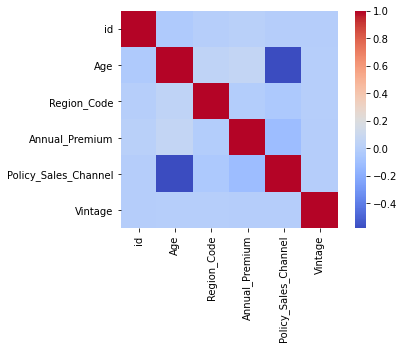

In [63]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

In [64]:
corr_matrix >0.2

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
id,True,False,False,False,False,False
Age,False,True,False,False,False,False
Region_Code,False,False,True,False,False,False
Annual_Premium,False,False,False,True,False,False
Policy_Sales_Channel,False,False,False,False,True,False
Vintage,False,False,False,False,False,True


Как мы видим, между показателями довольно слабые связи

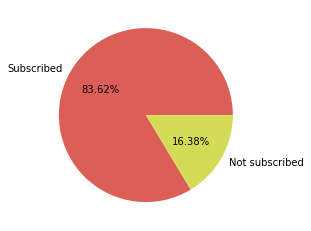

In [65]:
plt.pie(dataset.Response.value_counts(), labels = ["Subscribed", "Not subscribed"], colors = sns.color_palette("hls"), autopct = '%1.2f%%')
pass

Как мы видим, выборка является **несбалансированной**

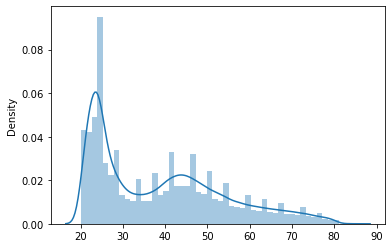

In [247]:
sns.distplot(dataset['Age'].values)
pass

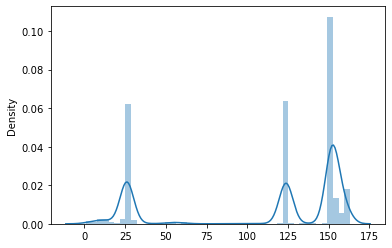

In [248]:
sns.distplot(dataset['Policy_Sales_Channel'].values)
pass

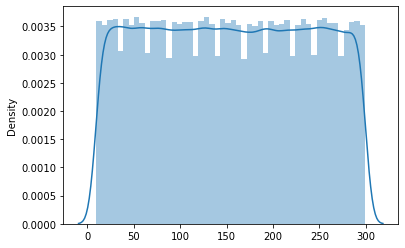

In [249]:
sns.distplot(dataset['Vintage'].values)
pass

как мы видим рассматриваются люди с страховым полисом от 10 до 299 дней

## Обработка категориальных признаков

In [66]:
categorical_columns = [c for c in dataset.columns if dataset[c].dtype.name == 'category']
numerical_columns   = [c for c in dataset.columns if dataset[c].dtype.name != 'category']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [67]:
for c in categorical_columns:
    print(c, dataset[c].unique())

Gender ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
Driving_License [1, 0]
Categories (2, int64): [1, 0]
Previously_Insured [1, 0]
Categories (2, int64): [1, 0]
Vehicle_Age ['< 1 Year', '1-2 Year', '> 2 Years']
Categories (3, object): ['< 1 Year', '1-2 Year', '> 2 Years']
Vehicle_Damage ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Response [0, 1]
Categories (2, int64): [0, 1]


In [68]:
data_describe = dataset.describe(include = ['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Response'] ['Vehicle_Age']


In [69]:
dataset.isna().sum()  

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Пропущенных значений нет

In [70]:
data_nonbinary = pd.get_dummies(dataset[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years'],
      dtype='object')


In [71]:
for col_num in binary_columns:
    dataset[col_num] = dataset[col_num].astype(object)

dataset.at[dataset['Gender'] == 'Male', 'Gender'] = 0
dataset.at[dataset['Gender'] == 'Female', 'Gender'] = 1

dataset.at[dataset['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
dataset.at[dataset['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1

for col_num in binary_columns:
    dataset[col_num] = dataset[col_num].astype('category')
dataset['Gender'].describe()

count     382154
unique         2
top            0
freq      205603
Name: Gender, dtype: int64

In [72]:
dataset['Vehicle_Damage'].describe()

count     382154
unique         2
top            0
freq      198501
Name: Vehicle_Damage, dtype: int64

In [73]:
dataset[nonbinary_columns]

,Vehicle_Age
0,< 1 Year
1,1-2 Year
2,1-2 Year
3,< 1 Year
4,< 1 Year
...,...
382149,< 1 Year
382150,< 1 Year
382151,1-2 Year
382152,< 1 Year


In [74]:
dataset[binary_columns]

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Response
0,0,1,1,0,0
1,0,1,0,1,0
2,1,1,0,1,0
3,1,1,0,0,0
4,0,1,1,0,0
...,...,...,...,...,...
382149,0,1,0,1,0
382150,0,1,1,0,0
382151,0,1,0,1,0
382152,1,1,1,0,0


In [75]:
print(data_nonbinary.head())

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years
0                     0                     1                      0
1                     1                     0                      0
2                     1                     0                      0
3                     0                     1                      0
4                     0                     1                      0


In [76]:
len(data_nonbinary.columns)

3

### Нормализация количественных признаков

In [77]:
data_numerical = dataset[numerical_columns]
data_numerical.describe()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,26.406867,30711.271362,111.939812,154.189429
std,139527.487326,15.226897,13.181241,17061.595532,54.286511,83.735107
min,1.000000,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,115006.250000,25.000000,15.000000,24546.000000,26.000000,81.000000
50%,230461.500000,36.000000,28.000000,31692.000000,145.000000,154.000000
75%,345434.750000,49.000000,35.000000,39447.750000,152.000000,227.000000
max,508145.000000,85.000000,52.000000,540165.000000,163.000000,299.000000


Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению

In [78]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05
mean,2.786989e-17,4.698793e-16,-4.686667e-15,-1.131573e-15,-5.982504e-16,1.297682e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.679898e+00,-1.217956e+00,-2.003367e+00,-1.645876e+00,-2.043598e+00,-1.721971e+00
25%,-8.556501e-01,-8.895897e-01,-8.653865e-01,-3.613537e-01,-1.583079e+00,-8.740591e-01
50%,-2.817691e-02,-1.671838e-01,1.208636e-01,5.748165e-02,6.089945e-01,-2.262240e-03
75%,7.958417e-01,6.865686e-01,6.519214e-01,5.120552e-01,7.379400e-01,8.695346e-01
max,1.961994e+00,3.050806e+00,1.941633e+00,2.985968e+01,9.405686e-01,1.729389e+00


In [79]:
dataset[binary_columns].describe()

,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Response
count,382154,382154,382154,382154,382154
unique,2,2,2,2,2
top,0,1,0,0,0
freq,205603,381431,195211,198501,319553


## Объединим все таблицы в одну

In [80]:
data = pd.concat((data_numerical, data_nonbinary, dataset[binary_columns]), axis = 1)

In [81]:
data.head()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Response
0,-0.478371,-1.086610,-1.472310,-1.645876,0.737940,-1.650317,0,1,0,0,1,1,0,0
1,-1.556897,0.226856,0.120864,0.739423,-1.583079,-0.229168,1,0,0,0,1,0,1,0
2,-1.450395,1.803014,0.500191,0.300659,0.222158,1.180038,1,0,0,1,1,0,1,0
3,-1.053168,-1.086610,0.500191,-0.179718,0.737940,-1.017368,0,1,0,1,1,0,0,0
4,1.917472,-0.692570,1.486441,-0.098952,0.737940,0.678456,0,1,0,0,1,1,0,0


In [82]:
data.describe()

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05,3.821540e+05,382154.000000,382154.000000,382154.000000
mean,2.786989e-17,4.698793e-16,-4.686667e-15,-1.131573e-15,-5.982504e-16,1.297682e-16,0.523810,0.435304,0.040887
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499433,0.495797,0.198028
min,-1.679898e+00,-1.217956e+00,-2.003367e+00,-1.645876e+00,-2.043598e+00,-1.721971e+00,0.000000,0.000000,0.000000
25%,-8.556501e-01,-8.895897e-01,-8.653865e-01,-3.613537e-01,-1.583079e+00,-8.740591e-01,0.000000,0.000000,0.000000
50%,-2.817691e-02,-1.671838e-01,1.208636e-01,5.748165e-02,6.089945e-01,-2.262240e-03,1.000000,0.000000,0.000000
75%,7.958417e-01,6.865686e-01,6.519214e-01,5.120552e-01,7.379400e-01,8.695346e-01,1.000000,1.000000,0.000000
max,1.961994e+00,3.050806e+00,1.941633e+00,2.985968e+01,9.405686e-01,1.729389e+00,1.000000,1.000000,1.000000


In [83]:
data

,id,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Gender,Driving_License,Previously_Insured,Vehicle_Damage,Response
0,-0.478371,-1.086610,-1.472310,-1.645876,0.737940,-1.650317,0,1,0,0,1,1,0,0
1,-1.556897,0.226856,0.120864,0.739423,-1.583079,-0.229168,1,0,0,0,1,0,1,0
2,-1.450395,1.803014,0.500191,0.300659,0.222158,1.180038,1,0,0,1,1,0,1,0
3,-1.053168,-1.086610,0.500191,-0.179718,0.737940,-1.017368,0,1,0,1,1,0,0,0
4,1.917472,-0.692570,1.486441,-0.098952,0.737940,0.678456,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,-0.500575,-0.955263,-0.865386,-0.396989,0.737940,-0.587441,0,1,0,0,1,0,1,0
382150,0.090814,-0.758243,0.120864,17.916480,0.737940,-0.121686,0,1,0,0,1,1,0,0
382151,-0.495243,0.423876,0.120864,0.570388,-1.583079,0.391838,1,0,0,0,1,0,1,0
382152,1.066801,-0.692570,0.120864,-0.312472,0.737940,0.642629,0,1,0,1,1,1,0,0


In [84]:
for column in data.columns:
    print(column)

id
Age
Region_Code
Annual_Premium
Policy_Sales_Channel
Vintage
Vehicle_Age_1-2 Year
Vehicle_Age_< 1 Year
Vehicle_Age_> 2 Years
Gender
Driving_License
Previously_Insured
Vehicle_Damage
Response


In [85]:
X = data.drop('Response', axis = 1)
y = data['Response']
feature_names = X.columns

In [86]:
type(feature_names)

pandas.core.indexes.base.Index

In [87]:
feature_names

Index(['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Gender', 'Driving_License',
       'Previously_Insured', 'Vehicle_Damage'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(286615, 95539)

## Импортируем необходимые модули для алгоритмов обучения

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble

# kNN - метод k ближайших соседей

In [274]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))

print(confusion_matrix(y_test, y_test_predict))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=1)
[[72729  7065]
 [ 7136  8609]]
Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.14864086917384522


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     382154 non-null  float64 
 1   Age                    382154 non-null  float64 
 2   Region_Code            382154 non-null  float64 
 3   Annual_Premium         382154 non-null  float64 
 4   Policy_Sales_Channel   382154 non-null  float64 
 5   Vintage                382154 non-null  float64 
 6   Vehicle_Age_1-2 Year   382154 non-null  uint8   
 7   Vehicle_Age_< 1 Year   382154 non-null  uint8   
 8   Vehicle_Age_> 2 Years  382154 non-null  uint8   
 9   Gender                 382154 non-null  category
 10  Driving_License        382154 non-null  category
 11  Previously_Insured     382154 non-null  category
 12  Vehicle_Damage         382154 non-null  category
 13  Response               382154 non-null  category
dtypes: category(5), floa

In [276]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))

print(confusion_matrix(y_test, y_test_predict))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=2)
[[77791  2003]
 [ 9400  6345]]
Ошибка на обучающей выборке:  0.07397379760305636
Ошибка на тестовой выборке:  0.11935439977391432


In [277]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))

print(confusion_matrix(y_test, y_test_predict))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=3)
[[75011  4783]
 [ 7801  7944]]
Ошибка на обучающей выборке:  0.0732550634125918
Ошибка на тестовой выборке:  0.13171584379154064


In [278]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))

print(confusion_matrix(y_test, y_test_predict))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier()
[[76112  3682]
 [ 8159  7586]]
Ошибка на обучающей выборке:  0.08734364914606703
Ошибка на тестовой выборке:  0.12393891499806362


KNeighborsClassifier(n_neighbors=8)
Ошибка на обучающей выборке:  0.09597892643441551
Ошибка на тестовой выборке:  0.11243575921874836


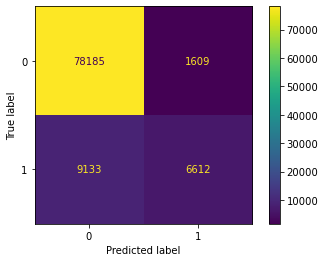

In [279]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))


print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)
plot_confusion_matrix(knn, X_test, y_test)

KNeighborsClassifier(n_neighbors=12)
Ошибка на обучающей выборке:  0.0996668004117021
Ошибка на тестовой выборке:  0.11104365756392677


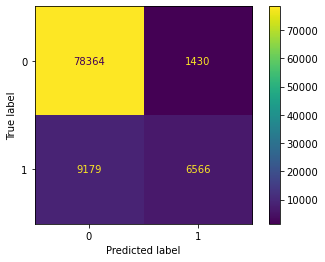

In [280]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))


print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)
plot_confusion_matrix(knn, X_test, y_test)

KNeighborsClassifier(n_neighbors=21)
Ошибка на обучающей выборке:  0.10335118538806413
Ошибка на тестовой выборке:  0.11046797642847424


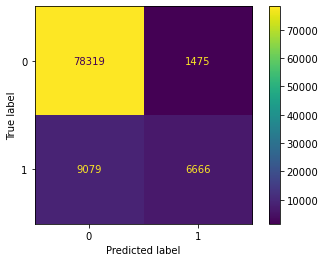

In [281]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))


print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)
plot_confusion_matrix(knn, X_test, y_test)

KNeighborsClassifier(n_neighbors=34)
Ошибка на обучающей выборке:  0.10486192278840954
Ошибка на тестовой выборке:  0.10811291723798658


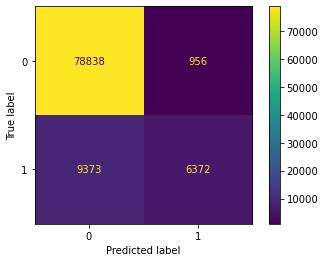

In [282]:
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))


print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)
plot_confusion_matrix(knn, X_test, y_test)

In [283]:
%%time
knn = KNeighborsClassifier()
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 35)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print('Кросс-валидационная ошибка: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Кросс-валидационная ошибка:  0.10849048374997816
Оптимальное количество соседей:  34
Wall time: 1h 57min 14s


Оптимальное решение на рассмотренном отрезке 34

## Support Vector Machine

In [284]:
%%time
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.10486541178933412
Ошибка на тестовой выборке:  0.1052449784904594
Wall time: 4h 11s


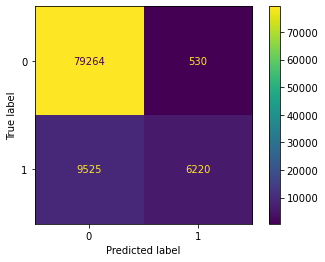

In [292]:
plot_confusion_matrix(svc, X_test, y_test)

## Random Forest

In [285]:
%%time
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  1.7445004622926224e-05
Ошибка на тестовой выборке:  0.10648007619924847


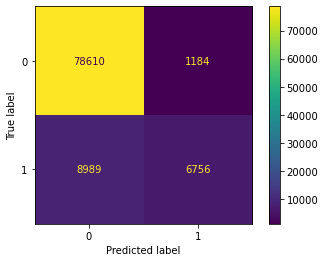

In [286]:
plot_confusion_matrix(rf, X_test, y_test)

## Extremely Randomized Trees

In [287]:
%%time
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.10928521336836265


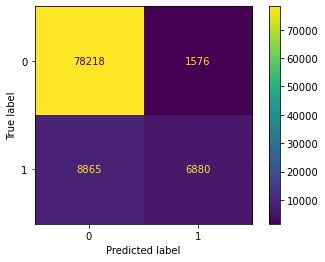

In [288]:
plot_confusion_matrix(ert, X_test, y_test)

## AdaBoost

In [289]:
%%time
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.10163808593409278
Ошибка на тестовой выборке:  0.10215723421848669


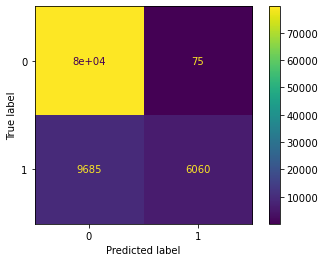

In [290]:
plot_confusion_matrix(ada, X_test, y_test)

## GBT

In [91]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1013694328628997
Ошибка на тестовой выборке:  0.10182229246695067
Wall time: 2min 40s


286615 95539


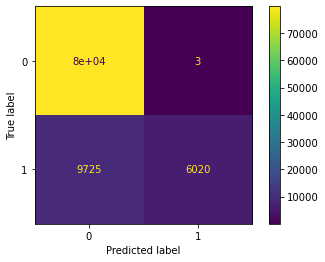

In [97]:
print(N_train, N_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbt, X_test, y_test)

## Борьба с несбалансированностью классов

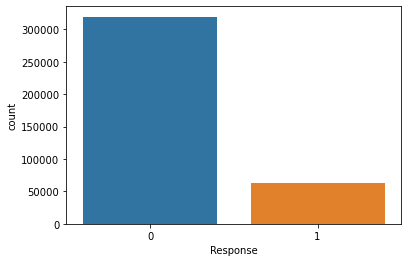

In [98]:
sns.countplot(x='Response', data=data)
pass

In [99]:
non_interest_count, interest_count = data['Response'].value_counts()

class_0 = data[data['Response'] == 0]
class_1 = data[data['Response'] == 1]
class_0_balanced = class_0.sample(interest_count)

balance_data = pd.concat([class_0_balanced, class_1], ignore_index=True, sort=False)
balance_data.shape

(125202, 14)

In [100]:
X = balance_data.drop(['Response'], axis=1)
y = balance_data['Response']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(93901, 31301)

# kNN - метод k ближайших соседей

In [50]:
knn = KNeighborsClassifier(n_neighbors = 34)
knn.fit(X_train, y_train)
print(knn)
y_test_predict = knn.predict(X_test)

err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != knn.predict(X_train))


print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)


KNeighborsClassifier(n_neighbors=34)
Ошибка на обучающей выборке:  0.16803867903430209
Ошибка на тестовой выборке:  0.17836490846937797


In [51]:
print(confusion_matrix(y_test, y_test_predict))

[[11552  4137]
 [ 1446 14166]]


## GBT

In [102]:
%%time
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.1624050862078146
Ошибка на тестовой выборке:  0.16747068783744928
Wall time: 43.6 s


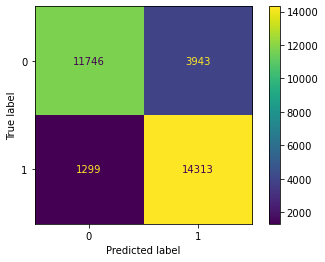

In [103]:
plot_confusion_matrix(gbt, X_test, y_test)

В случае сбалансированных данных ошибка увеличилась. Cкорее всего, это связано с существенным уменьшением объема данных после балансировки:
- до балансировки N_train, N_test: (286615 95539)
- после балансировки N_train, N_test: (93901, 31301)

Объем сбалансированных данных существенно уменьшился потому, что изначально разбиение двух классов составляло 84% vs 16%. Следовательно, во время балансировки объем данных первого класса уменьшался, чтобы количество его объектов соответствовало количеству объектов второго класса.

## Выводы

***По данным***

Данные являются несбалансированными (84% vs 16%)


Большинство клиентов не заинтересованы в страховании транспорта


В данных преобладают в основном мужчины имеющие водительские права

***По результатам работы алгоритмов***

- Алгоритм kNN оптимальное количество соседей составило 34 с ошибкой на обучающей выборке ~ 10,4% и с ошибкой на тестовой выборке ~ 10.8%
- Алгоритм Support Vector Machine: ошибка на обучающей выборке ~ 10.5%, ошибка на тестовой выборке ~ 10.5%
- Алгоритм Random Forest: ошибка на обучающей выборке ~ 0%, ошибка на тестовой выборке ~ 10.6%
- Алгоритм Extremely Randomized Trees: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 10.9%
- Алгоритм AdaBoost: ошибка на обучающей выборке ~ 10,1%, ошибка на тестовой выборке ~ 10.2%
- Алгоритм GBT: ошибка на обучающей выборке ~ 10.1%, ошибка на тестовой выборке ~ 10.2%
- приведение данных к сбалансированности классов не приводит к уменьшению ошибки классификации вследствие существенного сокращения объема данных после балансировкиСо сбалансированными классами ошибка возросла примерно на 6%


- Лучше всего на тестовой выборке себя показали алгоритмы AdaBoost и GBT с ошибкой в 10.2%
